# FSPS to generate Spectral Energy Distributions of galaxies
Scratch pad to figure out how to use FSPS to generate SEDs of galaxies

In [1]:
import fsps

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from ChangTools.plotting import prettyplot
from ChangTools.plotting import prettycolors

In [3]:
prettyplot()
pretty_colors = prettycolors()

## Lets first try to generate a single SSP

In [4]:
pop = fsps.StellarPopulation(zcontinuous=1)

In [5]:
default_params = dict([(k, pop.params[k]) for k in pop.params.all_params])

In [6]:
# single SSP 
pop.params['sfh'] = 0 # not convolved with SFH
wave, space = pop.get_spectrum(tage=1., peraa=True)

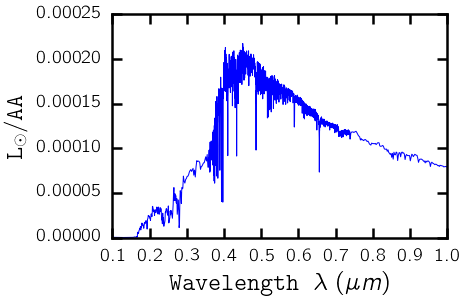

In [14]:
plt.plot(wave/1e4, space)
plt.xlim([0.1, 1.0])
plt.xlabel('Wavelength $\lambda\; (\mu m)$', fontsize=25)
plt.ylabel('$\mathtt{L_\odot/AA}$', fontsize=25)

In [15]:
# reset parameters
for k in pop.params.all_params:
    pop.params[k] = default_params[k]

## Now a Composite Stellar Population (CSP) a.k.a. a galaxy

In [16]:
pop.params['sfh'] = 1
pop.params['tau'] = 1.
wave, space = pop.get_spectrum(tage=1., peraa=True)

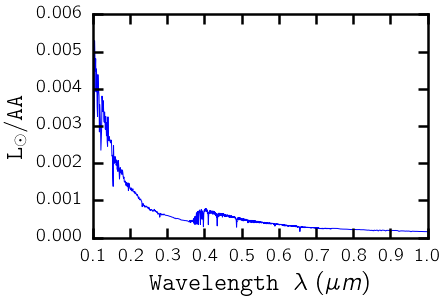

In [17]:
plt.plot(wave/1e4, space)
plt.xlim([0.1, 1.0])
plt.xlabel('Wavelength $\lambda\; (\mu m)$', fontsize=25)
plt.ylabel('$\mathtt{L_\odot/AA}$', fontsize=25)

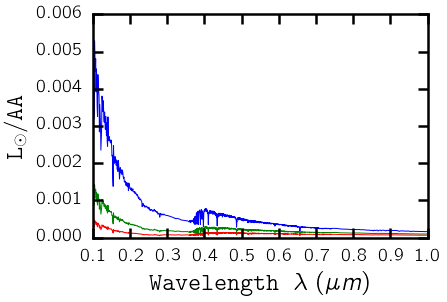

In [19]:
# reset parameters
for k in pop.params.all_params:
    pop.params[k] = default_params[k]
    
pop.params['sfh'] = 1
pop.params['tau'] = 1.
wave, space = pop.get_spectrum(tage=1., peraa=True)
plt.plot(wave/1e4, space)
wave, space = pop.get_spectrum(tage=2., peraa=True)
plt.plot(wave/1e4, space)
wave, space = pop.get_spectrum(tage=3., peraa=True)
plt.plot(wave/1e4, space)
plt.xlim([0.1, 1.0])
plt.xlabel('Wavelength $\lambda\; (\mu m)$', fontsize=25)
plt.ylabel('$\mathtt{L_\odot/AA}$', fontsize=25)

## Reverse engineering SEDfits from iSEDfit 
I'm going to use best-fit galaxy properties from SED fitting using iSEDfit in order to reproduce the observed magnitudes. 

**galaxy properites from iSEDfit:**
- From John Moustakas
- NSA galaxies

#### Galaxy 1 (iSEDfit ID 053999)
z = 0.0309

$log(M_*/M_\odot) = 9.16$

Age = 3.97 Gyr

$\tau$ = 1.0 Gyr

$Z/Z_\odot$ = 0.84

$A_{V, ISM}$ = 0.18 mag

$A_{V, BC}$ = 0.29 mag

$log {\rm SFR}$ = -0.77 $M_{\odot} yr^{-1}$

$log {\rm SFR}_{100}$ = -1.33 $M_{\odot} yr^{-1}$

$log b_{100}$ = -1.12 (*what is this?*)

In [20]:
# reset parameters
for k in pop.params.all_params:
    pop.params[k] = default_params[k]

In [21]:
pop.params['sfh'] = 1
pop.params['tau'] = 1.
pop.params['logzsol'] = 0.84
wave, space = pop.get_spectrum(tage=3.97, peraa=True)

check out the spectrum

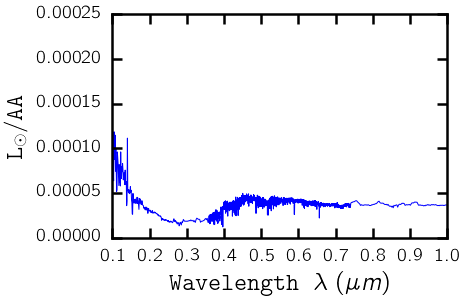

In [22]:
plt.plot(wave/1e4, space)
plt.xlim([0.1, 1.0])
plt.xlabel('Wavelength $\lambda\; (\mu m)$', fontsize=25)
plt.ylabel('$\mathtt{L_\odot/AA}$', fontsize=25)

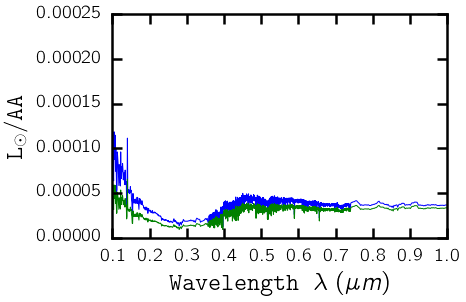

In [52]:
# reset parameters
for k in pop.params.all_params:
    pop.params[k] = default_params[k]

pop.params['sfh'] = 1
pop.params['tau'] = 1.
pop.params['logzsol'] = 0.84
wave, space = pop.get_spectrum(tage=3.97, peraa=True)

plt.plot(wave/1e4, space)

pop.params['dust_type'] = 2 
pop.params['dust2'] = 0.2

wave, space = pop.get_spectrum(tage=3.97, peraa=True)

plt.plot(wave/1e4, space)

plt.xlim([0.1, 1.0])
plt.xlabel('Wavelength $\lambda\; (\mu m)$', fontsize=25)
plt.ylabel('$\mathtt{L_\odot/AA}$', fontsize=25)

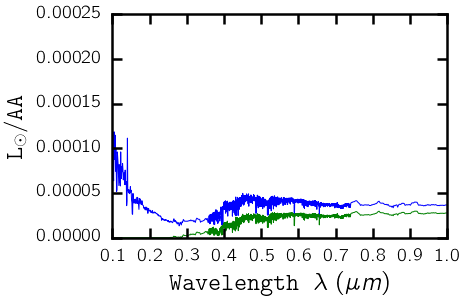

In [53]:
# reset parameters
for k in pop.params.all_params:
    pop.params[k] = default_params[k]

pop.params['sfh'] = 1
pop.params['tau'] = 1.
pop.params['logzsol'] = 0.84
wave, space = pop.get_spectrum(tage=3.97, peraa=True)

plt.plot(wave/1e4, space)

pop.params['tau'] = 0.01

wave, space = pop.get_spectrum(tage=3.97, peraa=True)

plt.plot(wave/1e4, space)

plt.xlim([0.1, 1.0])
plt.xlabel('Wavelength $\lambda\; (\mu m)$', fontsize=25)
plt.ylabel('$\mathtt{L_\odot/AA}$', fontsize=25)

In [93]:
# reset parameters
for k in pop.params.all_params:
    pop.params[k] = default_params[k]
    
#pop.params['compute_vega_mags'] = False
pop.params['sfh'] = 1
pop.params['tau'] = 1.
pop.params['logzsol'] = np.log10(0.84)
pop.params['zred'] = 0.0309
pop.params['dust_type'] = 2 
pop.params['dust2'] = 0.2

wave, space = pop.get_spectrum(tage=3.97, peraa=True)

spec *= 3.846e33

#plt.plot(wave/1.e4, np.log10(wave*space))

zwave = wave * (1. + 0.0309)
light = 2.99792458 #speed of light [A/s]

f_lam = space * 3.839 * 10**15 * zwave**2/light

f_ab = -2.5 * np.log10(f_lam) - 48.6

plt.xlim([0.1, 1.0])
plt.ylim([-5, 0])

AttributeError: 'StellarPopulation' object has no attribute 'totalmass'

# calculate the magnitudes in SDSS filters

In [23]:
sdss_bands = fsps.find_filter('sdss')

In [50]:
# reset parameters
for k in pop.params.all_params:
    pop.params[k] = default_params[k]
    
#pop.params['compute_vega_mags'] = False
pop.params['sfh'] = 1
pop.params['tau'] = 1.
pop.params['logzsol'] = np.log10(0.84)
pop.params['zred'] = 0.0309
pop.params['dust_type'] = 2 
pop.params['dust2'] = 0.2
sdss_mags = pop.get_mags(tage=3.97, bands=sdss_bands)
print sdss_mags

[ 7.74683366  6.42485857  5.54583355  5.8683194   5.2416238 ]


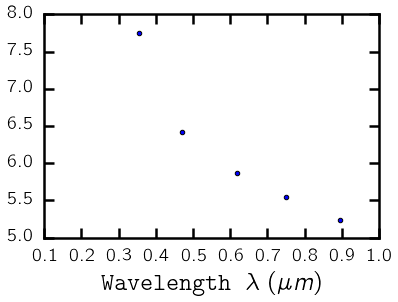

In [51]:
plt.scatter([fsps.get_filter(filt).lambda_eff/1.e4 for filt in sdss_bands], sdss_mags)
plt.xlim([0.1, 1.0])
plt.xlabel('Wavelength $\lambda\; (\mu m)$', fontsize=25)

In [95]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [98]:
d_lum = cosmo.luminosity_distance(0.0309).value * 1e6

In [99]:
print d_lum

135471186.031


In [100]:
mu = 5. * np.log10(d_lum) - 5
print mu

35.659234665
